# Find best parameters for Plain vanilla gradient descent and Adam descent
## Find $K$, $\tau$, $d$ and $h$ for PVGD
### Setup

In [1]:
from classes import *

def findhτPVGD(m, hmM, τmM, hn, τn, tol=1e-4, maxiter=1e4):
    hList = np.linspace(hmM[0], hmM[1], hn)
    τList = np.linspace(τmM[0], τmM[1], τn)
    hEp = {}  # in case of error (error proof)
    Jθ = {}
    r = 0
    # tot = len(hList)*len(τList)

    for τ in τList:
        hEp[τ] = []
        Jθ[τ] = []
        try:
            for h in hList:
                r += 1
                m.run(h, τ, tol, maxiter)
                Jθ[τ].append(m.M.Jθ)
                hEp[τ].append(h)
                m.M.restart()
                # print(f'run {r}/{tot}')
        except Exception as e:
            print(e, 'h =', h)

    return hEp, Jθ

def plotParamSearchResults(h, Jθ, m):
    bestJ = 1e7
    for τ, h in h.items():
        plt.plot(h, Jθ[τ], label=r'$\tau={}$'.format(round(τ, 5)))
        hi = 0
        for J in Jθ[τ]:
            if J < bestJ:
                bestJ = J
                τatBest = [τ, h[hi]]
            hi += 1

    print(f'Best Jθ={bestJ} when τ={τatBest[0]}, h={τatBest[1]}')
    # plt.ylim(0, 0.1)
    plt.xlabel('h')
    plt.ylabel(r'$J(\theta)$')
    plt.title(r'$J(\theta)$ after {} iterations with $K={}$, $I={}$'.format(m.maxiter, m.M.K, m.M.I))
    plt.legend()
    plt.show()

def timeIt():
    start = dt.now()
    yield
    print(f'runtime: {dt.now() - start}')

In [2]:
# Setup function to search for params on
y100 = np.array([np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)])
y1000 = np.array([np.linspace(-2, 2, 1000), np.linspace(-2, 2, 1000)])
y4000 = np.array([np.linspace(-2, 2, 4000), np.linspace(-2, 2, 4000)])

c100 = F22(y100[0], y100[1])
c1000 = F22(y1000[0], y1000[1])
c4000 = F22(y4000[0], y4000[1])

c100scaled = scale(c100.copy())
c1000scaled = scale(c1000.copy())
c4000scaled = scale(c4000.copy())

mod10_100 = Model(y100, c100scaled, 10)
mod15_100 = Model(y100, c100scaled, 15)
mod20_100 = Model(y100, c100scaled, 20)

mod10_1000 = Model(y1000, c1000scaled, 10)
mod15_1000 = Model(y1000, c1000scaled, 15)
mod20_1000 = Model(y1000, c1000scaled, 20)

mod10_4000 = Model(y4000, c4000scaled, 10)
mod15_4000 = Model(y4000, c4000scaled, 15)
mod20_4000 = Model(y4000, c4000scaled, 20)

### PVGD

In [3]:
pvgd10_100 = PVGD(mod10_100.copy())
pvgd15_100 = PVGD(mod15_100.copy())
pvgd20_100 = PVGD(mod20_100.copy())

pvgd10_1000 = PVGD(mod10_1000.copy())
pvgd15_1000 = PVGD(mod15_1000.copy())
pvgd20_1000 = PVGD(mod20_1000.copy())

pvgd10_4000 = PVGD(mod10_4000.copy())
pvgd15_4000 = PVGD(mod15_4000.copy())
pvgd20_4000 = PVGD(mod20_4000.copy())


#### 100 datapoints

Runtime: 0:01:05.839603


<IPython.core.display.Javascript object>


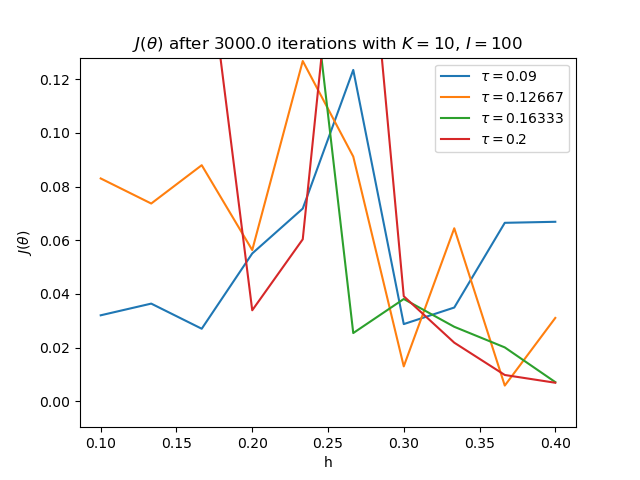

Best Jθ=0.005812553341655073 when τ=0.12666666666666668, h=0.3666666666666667


In [32]:
%matplotlib notebook
hminMax = (0.1, 0.4)
τminMax = (0.09, 0.2)
start = dt.now()
h, Jθ = findhτPVGD(pvgd10_100, hminMax, τminMax, 10, 4, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
plotParamSearchResults(h, Jθ, pvgd10_100)

Runtime: 0:01:33.780507


<IPython.core.display.Javascript object>


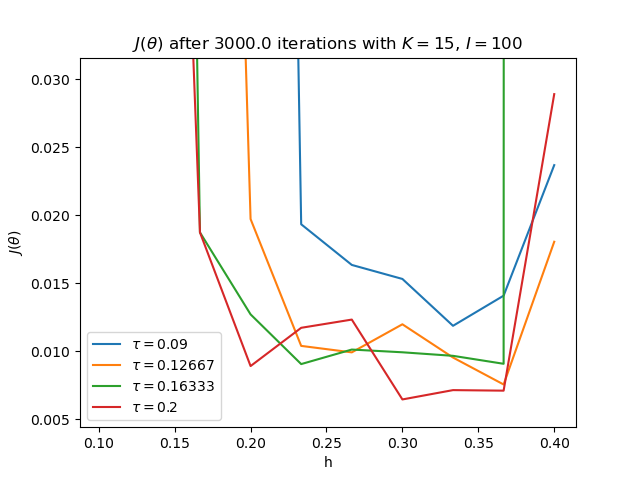

Best Jθ=0.006452130527202079 when τ=0.2, h=0.30000000000000004


In [33]:
hminMax = (0.1, 0.4)
τminMax = (0.09, 0.2)
start = dt.now()
h, Jθ = findhτPVGD(pvgd15_100, hminMax, τminMax, 10, 4, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
plotParamSearchResults(h, Jθ, pvgd15_100)

Runtime: 0:02:12.803171


<IPython.core.display.Javascript object>


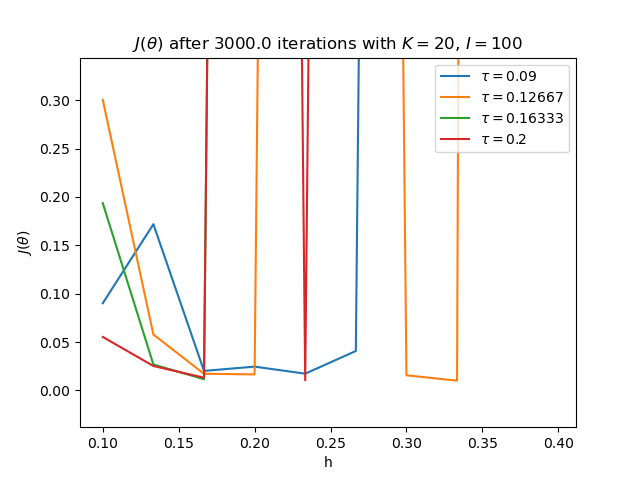

Best Jθ=0.01016846380398506 when τ=0.12666666666666668, h=0.33333333333333337


In [34]:
hminMax = (0.1, 0.4)
τminMax = (0.09, 0.2)
start = dt.now()
h, Jθ = findhτPVGD(pvgd20_100, hminMax, τminMax, 10, 4, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
plotParamSearchResults(h, Jθ, pvgd20_100)

#### 1000 datapoints

Runtime: 0:04:49.115086


<IPython.core.display.Javascript object>


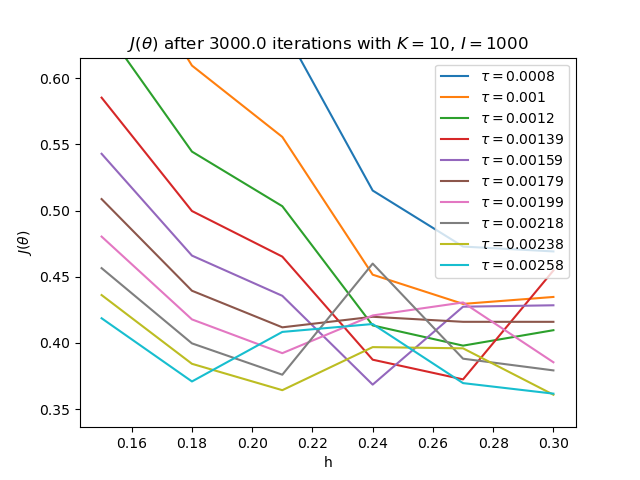

Best Jθ=0.36090228170972477 when τ=0.002382222222222222, h=0.3


In [48]:
hminMax = (0.15, 0.3)
τminMax = (0.0008, 0.00258)
start = dt.now()
h, Jθ = findhτPVGD(pvgd10_1000, hminMax, τminMax, 6, 10, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
plotParamSearchResults(h, Jθ, pvgd10_1000)

Runtime: 0:07:51.802753


<IPython.core.display.Javascript object>


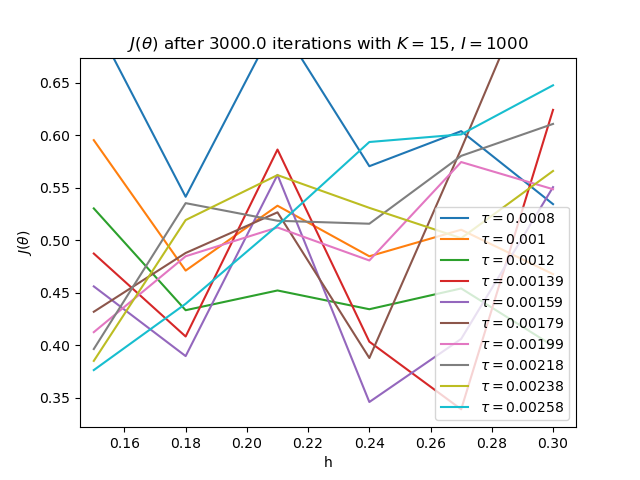

Best Jθ=0.3391157598682065 when τ=0.0013933333333333332, h=0.27


In [50]:
hminMax = (0.15, 0.3)
τminMax = (0.0008, 0.00258)
start = dt.now()
h, Jθ = findhτPVGD(pvgd15_1000, hminMax, τminMax, 6, 10, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
plotParamSearchResults(h, Jθ, pvgd15_1000)

Runtime: 0:16:34.177239


<IPython.core.display.Javascript object>


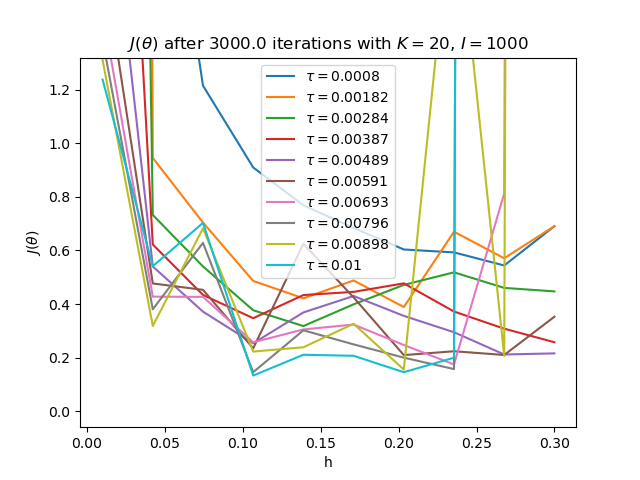

Best Jθ=0.13336230307232405 when τ=0.01, h=0.10666666666666666


In [81]:
hminMax = (0.01, 0.3)
τminMax = (0.0008, 0.01)
start = dt.now()
h, Jθ = findhτPVGD(pvgd20_1000, hminMax, τminMax, 10, 10, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
%matplotlib notebook
plotParamSearchResults(h, Jθ, pvgd20_1000)

#### 4000 datapoints

Runtime: 0:04:10.526486


<IPython.core.display.Javascript object>


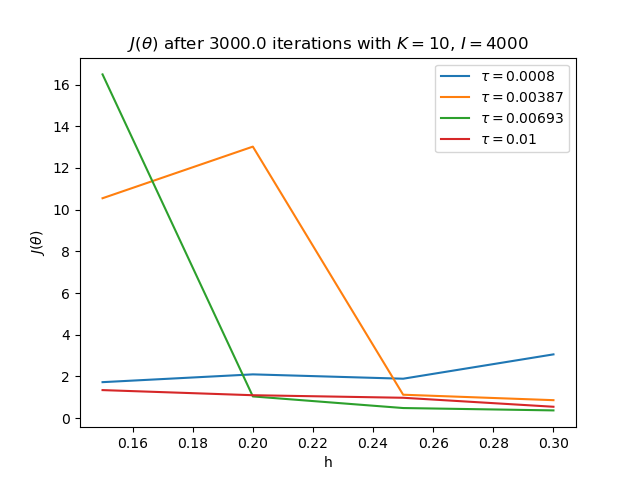

Best Jθ=0.3692242513113208 when τ=0.006933333333333334, h=0.3


In [82]:
hminMax = (0.15, 0.3)
τminMax = (0.0008, 0.01)
start = dt.now()
h, Jθ = findhτPVGD(pvgd10_4000, hminMax, τminMax, 4, 4, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
%matplotlib notebook
plotParamSearchResults(h, Jθ, pvgd10_4000)

Runtime: 0:01:24.494711


<IPython.core.display.Javascript object>


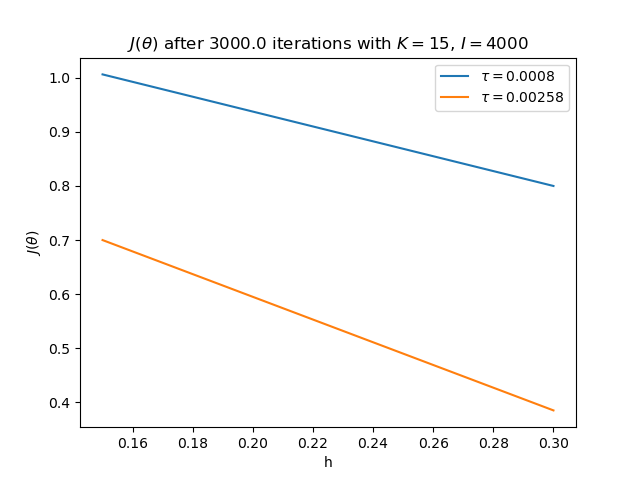

Best Jθ=0.3850680793712106 when τ=0.00258, h=0.3


In [10]:
hminMax = (0.15, 0.3)
τminMax = (0.0008, 0.00258)
start = dt.now()
h, Jθ = findhτPVGD(pvgd15_4000, hminMax, τminMax, 2, 2, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
%matplotlib notebook
plotParamSearchResults(h, Jθ, pvgd15_4000)

In [ ]:
hminMax = (0.15, 0.3)
τminMax = (0.0008, 0.00258)
start = dt.now()
h, Jθ = findhτPVGD(pvgd20_4000, hminMax, τminMax, 2, 2, tol=1e-5, maxiter=3*1e3)
print('Runtime:', dt.now() - start)
%matplotlib notebook
plotParamSearchResults(h, Jθ, pvgd20_4000)

### Adam

In [4]:
def findhAdam(m, f, t, n, tol=1e-5, maxiter=3*1e3):
    hList = np.linspace(f, t, n)
    Jθlist = []
    hErrorProof = []
    r = 0
    for h in hList:
        r += 1
        try:
            m.run(h, tol, maxiter)
            Jθlist.append(m.M.Jθ)
            hErrorProof.append(h)
            m.M.restart()
        except Exception as e:
            print('Error occured when h={}:\n{}'.format(h, e))

    plt.plot(hErrorProof, Jθlist)
    plt.xlabel('h')
    plt.ylabel(r'$J(\theta)$')
    plt.title(r'$J(\theta)$ after {} iterations with $K={}$, $I={}$'.format(m.maxiter, m.M.K, m.M.I))
    plt.show()
    bestJ = min(Jθlist)
    i = Jθlist.index(bestJ)
    print('Best h:', hErrorProof[i], ', J(θ) =', bestJ)

In [5]:
adam10_100 = Adam(mod10_100.copy())
adam15_100 = Adam(mod15_100.copy())
adam20_100 = Adam(mod20_100.copy())

adam10_1000 = Adam(mod10_1000.copy())
adam15_1000 = Adam(mod15_1000.copy())
adam20_1000 = Adam(mod20_1000.copy())

adam10_4000 = Adam(mod10_4000.copy())
adam15_4000 = Adam(mod15_4000.copy())
adam20_4000 = Adam(mod20_4000.copy())


<IPython.core.display.Javascript object>


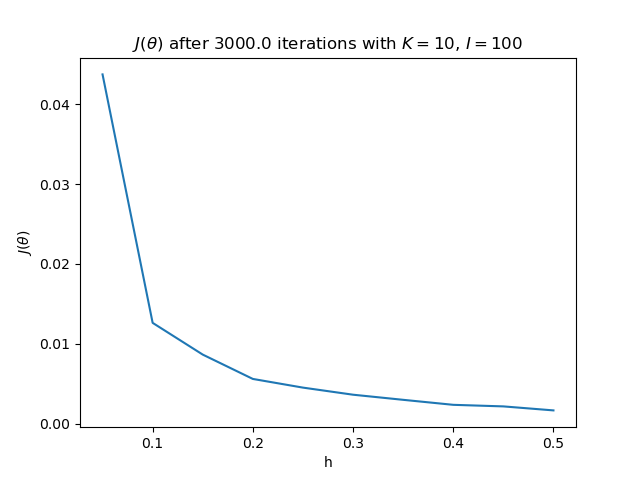

Best h: 0.5 , J(θ) = 0.0016854790035017771
Runtime: 0:00:23.975642


In [85]:
%matplotlib notebook
start = dt.now()
findhAdam(adam10_100, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

<IPython.core.display.Javascript object>


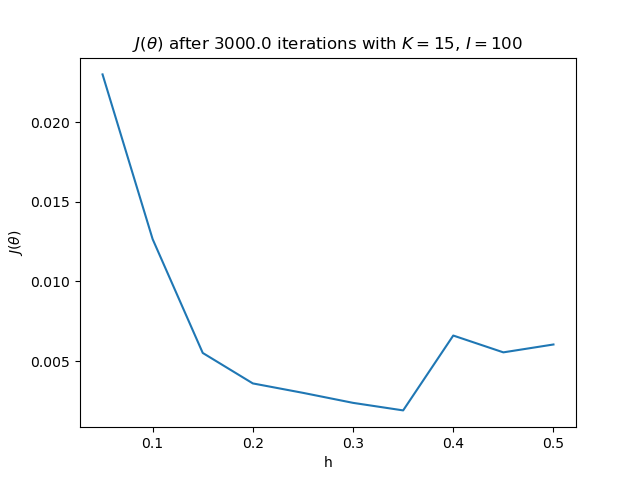

Best h: 0.35000000000000003 , J(θ) = 0.0018960111202656746
Runtime: 0:00:41.276412


In [86]:
start = dt.now()
%matplotlib notebook
findhAdam(adam15_100, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

<IPython.core.display.Javascript object>


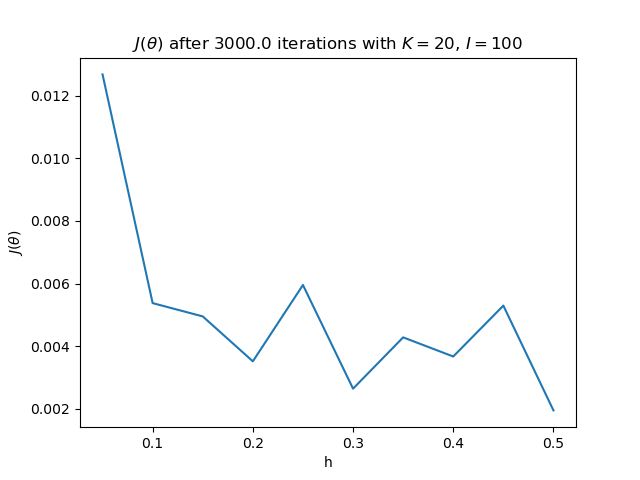

Best h: 0.5 , J(θ) = 0.0019430798584324077
Runtime: 0:00:46.828230


In [6]:
start = dt.now()
%matplotlib notebook
findhAdam(adam20_100, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

#### 1000 datapoints

<IPython.core.display.Javascript object>


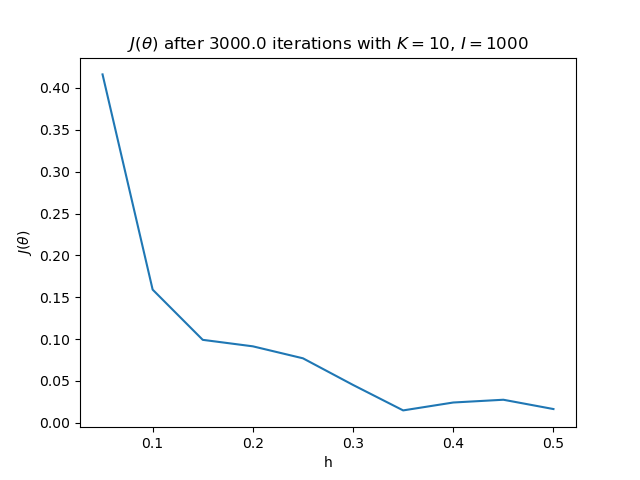

Best h: 0.35000000000000003 , J(θ) = 0.014817027226302324
Runtime: 0:01:14.897076


In [7]:
start = dt.now()
%matplotlib notebook
findhAdam(adam10_1000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

<IPython.core.display.Javascript object>


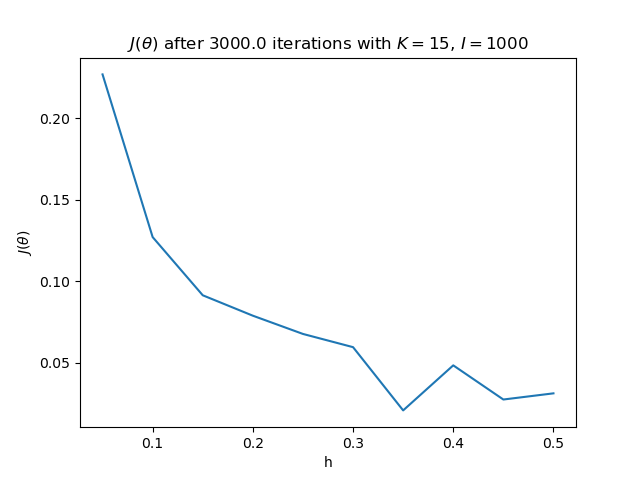

Best h: 0.35000000000000003 , J(θ) = 0.02082659158354591
Runtime: 0:01:48.309931


In [8]:
start = dt.now()
%matplotlib notebook
findhAdam(adam15_1000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

<IPython.core.display.Javascript object>


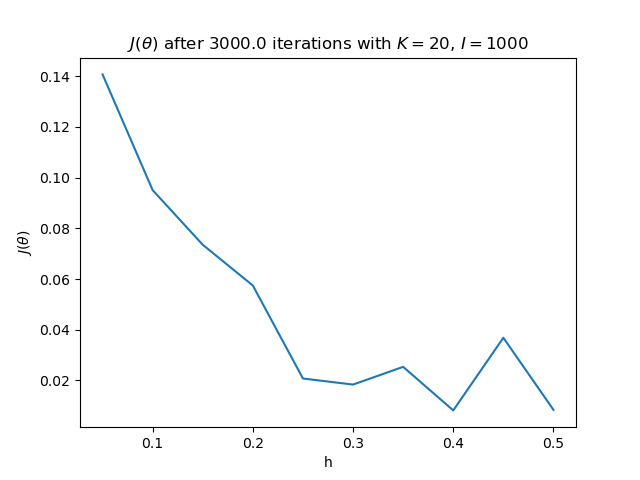

Best h: 0.4 , J(θ) = 0.008192099922245658
Runtime: 0:02:37.378712


In [9]:
start = dt.now()
%matplotlib notebook
findhAdam(adam20_1000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

#### 4000 datapoints

<IPython.core.display.Javascript object>


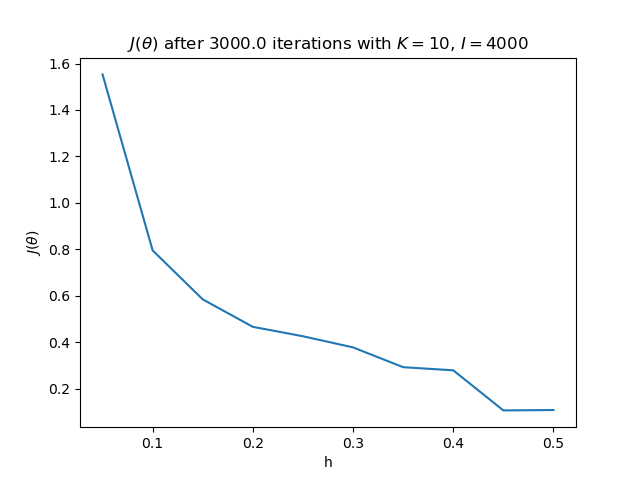

Best h: 0.45 , J(θ) = 0.1068543855654086
Runtime: 0:02:26.220911


In [11]:
start = dt.now()
%matplotlib notebook
findhAdam(adam10_4000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

In [ ]:
start = dt.now()
%matplotlib notebook
findhAdam(adam15_4000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)

In [ ]:
start = dt.now()
%matplotlib notebook
findhAdam(adam20_4000, 0.05, 0.5, 10)
print('Runtime:', dt.now() - start)